### Scratchwork for PEC Development

Workflow:
Input_VEDA + Input_Reference -> Output_Calculation

Idea: one instance per calculation run
Relations: Output_Calculation maps to a Input_VEDA + Input_Reference

*VEDA Input: either an API or hard-passed URL to a VEDA dataset*
- API: accessed through VEDA API (priority)
- URL: directly passed for access (secondary due to complications)
- Class
- Global vars:
    - Live track of all instances
- Instance vars:
    - Hash?
    - CRS
    - API or URL
    - Bounding box
    - Time
- Methods: 
    - getInstanceDetails()
    - 

*Reference Input: generalized input which we compare VEDA input to*
- Class
- Global vars:
    - Live tracking
    - 
- Instance vars:
    - Hash?
    - CRS
    - URL/location
    - Platform/how to read
- Methods:
    - Read_from_source()
    - getInstanceDetails()

*Calculation Output: generalized output containing all calculations + metadata/settings to replicate*
- Class
- Global vars:
    - live_track_all
- Instance vars:
    - what_calculations
    - meta_data
- Methods:
    - plot/visualize()
    - get_metadata()
    - dump_contents()
    - regen_from_contents()

Back-burner:
- Able to load in previous instances by dumping contents to Output_Calculation?
    - For plotting, re-analysis/re-generation, etc?
- Do we want one ipynb run per results? Multi-tracking?
    - Maybe not multiple instances, but we want to neatly track properties
- Any subclasses? Private/Public
 
 
 
 #######################

# Test ArcGIS online reading

In [ ]:
#!pip install arcgis

In [13]:
import requests

geojson_url = "https://services3.arcgis.com/T4QMspbfLg3qTGWY/arcgis/rest/services/WFIGS_Interagency_Perimeters_Current/FeatureServer/0/query?outFields=*&where=1%3D1&f=geojson"

response = requests.get(geojson_url)

if response.status_code == 200:
    with open("output.geojson", "wb") as geojson_file:
        geojson_file.write(response.content)
    print("GeoJSON data downloaded and saved to output.geojson")
else:
    print(f"Failed to retrieve data. Status code: {response.status_code}")


GeoJSON data downloaded and saved to output.geojson


/tmp/ipykernel_411/1798059233.py:10: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf.to_file(output_shapefile)


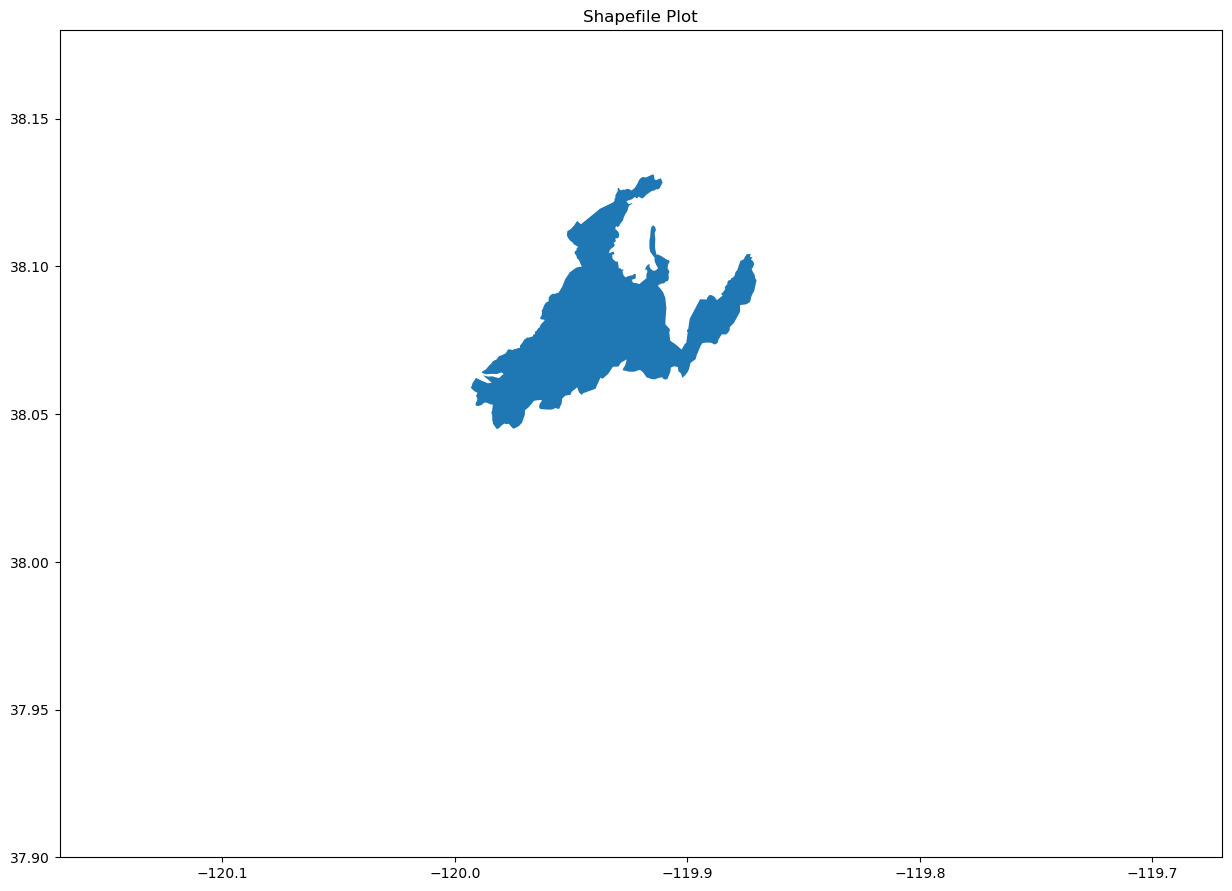

   OBJECTID  poly_SourceOID poly_IncidentName           poly_FeatureCategory  \
0     17421           17647          Hat Rock  Wildfire Daily Fire Perimeter   
1     17891           31532          Consalus  Wildfire Daily Fire Perimeter   
2     18118           33547              Flat  Wildfire Daily Fire Perimeter   
3     18426           36447           Bedrock  Wildfire Daily Fire Perimeter   
4     18618           29541           Lowline  Wildfire Daily Fire Perimeter   

            poly_MapMethod  poly_GISAcres  poly_CreateDate  poly_DateCurrent  \
0            Mixed Methods   16816.510979    1686966369000     1686966417000   
1            Mixed Methods     471.672664    1691834816000     1691835005000   
2            Mixed Methods   34241.688063    1692420054000     1696715435000   
3  IR Image Interpretation   31589.200694    1693487522000     1694867082000   
4            Mixed Methods    1899.305731    1691166205000     1692907973000   

   poly_PolygonDateTime               

In [27]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Read the GeoJSON file
geojson_file = "output.geojson"
gdf = gpd.read_file(geojson_file)

# Save the GeoDataFrame as a shapefile
output_shapefile = "output.shp"
gdf.to_file(output_shapefile)

fig, ax = plt.subplots(figsize=(15, 15))

# bound box as defined by us
# searchbbox ["-120.303585", "38.350702", "-119.589919", "37.823119"] 

left = -120.17
right = -119.67
bottom = 37.9
top = 38.18
ax.set_xlim(left, right)
ax.set_ylim(bottom, top)

# ["-120.17","38.18","-119.67","37.9"]

filtered_gdf = gdf[gdf['poly_IncidentName'] == 'Quarry']

filtered_gdf.plot(ax=ax)

# Show the plot
plt.title("Shapefile Plot")
plt.show()

print(gdf.head())
print(type(gdf))

print(gdf['poly_PolygonDateTime'].dtype)
print(gdf.loc[1, 'poly_PolygonDateTime'])
print(gdf.loc[1, 'poly_IncidentName'])

# Test VEDA API Access for FirePerims

In [3]:
!pip install OWSLib==0.28.1 --quiet

In [28]:
from owslib.ogcapi.features import Features
import geopandas as gpd
import datetime as dt
from datetime import datetime, timedelta

In [29]:
OGC_URL = "https://firenrt.delta-backend.com"

w = Features(url=OGC_URL)
w.feature_collections()

['public.eis_fire_snapshot_fireline_nrt',
 'public.eis_fire_snapshot_newfirepix_nrt',
 'public.eis_fire_snapshot_perimeter_nrt',
 'public.eis_fire_lf_fireline_archive',
 'public.eis_fire_lf_perimeter_archive',
 'public.eis_fire_lf_fireline_nrt',
 'public.eis_fire_lf_nfplist_nrt',
 'public.eis_fire_lf_perimeter_nrt',
 'public.eis_fire_lf_nfplist_archive',
 'public.eis_fire_lf_newfirepix_nrt',
 'public.eis_fire_lf_newfirepix_archive',
 'public.eis_fire_fwi',
 'public.st_squaregrid',
 'public.st_hexagongrid',
 'public.st_subdivide']

In [30]:
perm = w.collection("public.eis_fire_lf_perimeter_nrt")
print(type(perm))
print(perm)

<class 'dict'>
{'id': 'public.eis_fire_lf_perimeter_nrt', 'title': 'public.eis_fire_lf_perimeter_nrt', 'links': [{'href': 'https://firenrt.delta-backend.com/collections/public.eis_fire_lf_perimeter_nrt', 'rel': 'self', 'type': 'application/json'}, {'href': 'https://firenrt.delta-backend.com/collections/public.eis_fire_lf_perimeter_nrt/items', 'rel': 'items', 'type': 'application/geo+json', 'title': 'Items'}, {'href': 'https://firenrt.delta-backend.com/collections/public.eis_fire_lf_perimeter_nrt/items?f=csv', 'rel': 'alternate', 'type': 'text/csv', 'title': 'Items (CSV)'}, {'href': 'https://firenrt.delta-backend.com/collections/public.eis_fire_lf_perimeter_nrt/items?f=geojsonseq', 'rel': 'alternate', 'type': 'application/geo+json-seq', 'title': 'Items (GeoJSONSeq)'}, {'href': 'https://firenrt.delta-backend.com/collections/public.eis_fire_lf_perimeter_nrt/queryables', 'rel': 'queryables', 'type': 'application/schema+json', 'title': 'Queryables'}], 'extent': {'spatial': {'bbox': [[-124.6

In [31]:
perm["extent"]["temporal"]["interval"][0]

['2023-01-01T00:00:00+00:00', '2023-10-21T12:00:00+00:00']

In [32]:
most_recent_time = max(*perm["extent"]["temporal"]["interval"])
print(type(most_recent_time))
most_recent_time = max(*perm["extent"]["temporal"]["interval"])
now = dt.datetime.strptime(most_recent_time, "%Y-%m-%dT%H:%M:%S+00:00")
last_week = now - dt.timedelta(weeks=1)
last_week = dt.datetime.strftime(last_week, "%Y-%m-%dT%H:%M:%S+00:00")
print("Most Recent Time =", most_recent_time)
print("Last week =", last_week)

<class 'str'>
Most Recent Time = 2023-10-21T12:00:00+00:00
Last week = 2023-10-14T12:00:00+00:00


In [38]:
perm_results = w.collection_items(
    "public.eis_fire_lf_perimeter_nrt",  # name of the dataset we want
    bbox=["-120.17","38.18","-119.67","37.9"],  # coodrinates of bounding box,
    datetime=[last_week + "/" + most_recent_time],  # date range
    limit=1000,  # max number of items returned
    filter="farea>5 AND duration>2",  # additional filters based on queryable fields
)
# perm_results
print(last_week)
print(most_recent_time)

perm_results = w.collection_items(
    "public.eis_fire_lf_perimeter_nrt",  # name of the dataset we want
    bbox=["-120.17","38.18","-119.67","37.9"],  # coodrinates of bounding box,
    datetime=[last_week + "/" + most_recent_time],  # date range
    limit=1000  # max number of items returned  # additional filters based on queryable fields
)

print("public.eis_fire_lf_perimeter_nrt",  # name of the dataset we want
      ["-106.8", "24.5", "-72.9", "37.3"],  # coodrinates of bounding box,
     [last_week + "/" + most_recent_time],  # date range
    1000)

2023-10-14T12:00:00+00:00
2023-10-21T12:00:00+00:00
public.eis_fire_lf_perimeter_nrt ['-106.8', '24.5', '-72.9', '37.3'] ['2023-10-14T12:00:00+00:00/2023-10-21T12:00:00+00:00'] 1000


In [39]:
df = gpd.GeoDataFrame.from_features(perm_results["features"])
df

print(type(df['t'][0]))

<class 'str'>


In [40]:
df = gpd.GeoDataFrame.from_features(perm_results["features"])
print(type(df))
print(type("hi"))
df.columns
# think about index return to persist

<class 'geopandas.geodataframe.GeoDataFrame'>
<class 'str'>


Index(['geometry', 'duration', 'farea', 'fireid', 'flinelen', 'fperim',
       'meanfrp', 'n_newpixels', 'n_pixels', 'ogc_fid', 'pixden', 't'],
      dtype='object')

<AxesSubplot:>

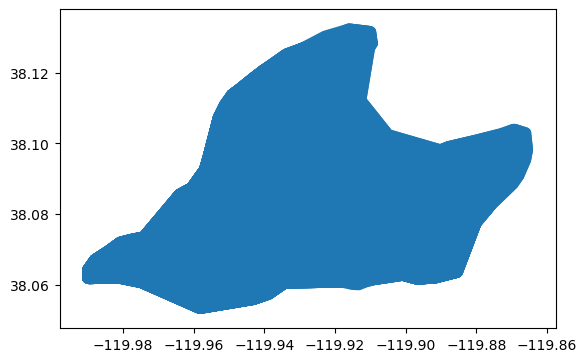

In [41]:
df.plot()

# Read NIFC Polygons from Local MAAP

In [39]:
import geopandas as gpd
df = gpd.read_file("/projects/shared-buckets/ksharonin/InterAgencyFirePerimeterHistory")
df['index'] = df.index
print(df['index'][1])
# df

# want index persisted for future fetch
new = df[df['UNQE_FIRE_'] == '2021-AKFAS-000397']
print(new.iloc[[0]]['index'].values[0])
print(type(new.iloc[[0]]['index'].values[0]))

1
2
<class 'numpy.int64'>


In [1]:
import boto3
from botocore.exceptions import NoCredentialsError, PartialCredentialsError, EndpointConnectionError
import Utilities

In [8]:
s3_url = "s3://maap-ops-workspace/shared/ksharonin/sample.txt"


# fetch s3 bucket and check if exists (not concerned w key since we will be making item)

def __set_up_valid_maap_url(url):
    """ given a maap-ops-workspace url, check if valid with naming + s3 access"""

    s3_url = url

    # try:
    s3 = boto3.client('s3')
    bucket, key, nested = Utilities.split_s3_path(s3_url)

    if nested:
        # iter and locate bucket
        # List objects in the parent bucket with the specified prefix
        assert len(bucket) == 2, "FATAL: bucket + prefix design should only be len2"
        print(bucket[0])
        print(bucket[1])
        response = s3.list_objects_v2(Bucket=bucket[0], Prefix=bucket[1])

        folders = set(object['Key'][:object['Key'].rfind('/')+1] for object in response['Contents'] if '/' in object['Key'])

        # Print the results
        print('\n'.join(sorted(folders)))
        print(bucket[1] in folders)
    else:
        obj = s3.Bucket(bucket)

    """
    except NoCredentialsError:
        print("AWS credentials not found. Please configure your AWS credentials.")
    except PartialCredentialsError:
        print("Incomplete AWS credentials found.")
    except EndpointConnectionError:
        print("Could not connect to the AWS endpoint. Please check your AWS configuration.")
    except Exception as e:
        print(f"Error: {str(e)}") """

    return False

__set_up_valid_maap_url(s3_url)

maap-ops-workspace
shared/ksharonin/
shared/ksharonin/
shared/ksharonin/.Trash-0/
shared/ksharonin/.Trash-0/files/
shared/ksharonin/.Trash-0/info/
shared/ksharonin/.empty/
shared/ksharonin/.ipynb_checkpoints/
shared/ksharonin/InterAgencyFirePerimeterHistory/
shared/ksharonin/InterAgencyFirePerimeterHistory/.ipynb_checkpoints/
shared/ksharonin/USAShapeFile/
shared/ksharonin/VEDA-PEC/
shared/ksharonin/VEDA-PEC/.git/
shared/ksharonin/VEDA-PEC/.git/branches/
shared/ksharonin/VEDA-PEC/.git/hooks/
shared/ksharonin/VEDA-PEC/.git/info/
shared/ksharonin/VEDA-PEC/.git/logs/
shared/ksharonin/VEDA-PEC/.git/logs/refs/
shared/ksharonin/VEDA-PEC/.git/logs/refs/heads/
shared/ksharonin/VEDA-PEC/.git/logs/refs/remotes/
shared/ksharonin/VEDA-PEC/.git/logs/refs/remotes/origin/
shared/ksharonin/VEDA-PEC/.git/objects/
shared/ksharonin/VEDA-PEC/.git/objects/00/
shared/ksharonin/VEDA-PEC/.git/objects/01/
shared/ksharonin/VEDA-PEC/.git/objects/02/
shared/ksharonin/VEDA-PEC/.git/objects/03/
shared/ksharonin/VED

False

### assuming nifc object made from outline

In [ ]:
# assuming nifc object made from outline

ax = nifc_search.polygons.plot()
ax.set_xlim(-122.887312, -122.601345)
ax.set_ylim(38.560242, 38.813395)